# Regressão Logística

**Objetivos**: Explorar e praticar conceitos relacionados à Regressão Logística, uma técnica fundamental em aprendizado de máquina para problemas de classificação.

Usando a biblioteca `Scikit-Learn`.

## Definição - Regressão Logística

A regressão logística é um método estatístico utilizado para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. Ela é frequentemente utilizada para problemas de classificação, onde o objetivo é prever a probabilidade de ocorrência de um evento ou classe.

A regressão logística utiliza a função sigmóide para modelar as probabilidades condicionais das classes. A função sigmóide transforma a soma ponderada das variáveis independentes em um valor entre 0 e 1, representando a probabilidade de pertencer à classe positiva. A equação da função sigmóide é:

$$\operatorname{P(Y=1∣X)} = \frac{1}{1 + e^{(-z)}}$$

Onde:

*   P(Y=1∣X) é a probabilidade condicional de Y ser igual a 1 dado X.
*   X são as variáveis independentes.
*   z é a soma ponderada das variáveis independentes e seus coeficientes.


##Gerando dados de exemplo

>Utilizando a função make_classification do sklearn.datasets para gerar dados de exemplo. Neste caso, geramos 100 amostras com 1 feature.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets

In [3]:
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

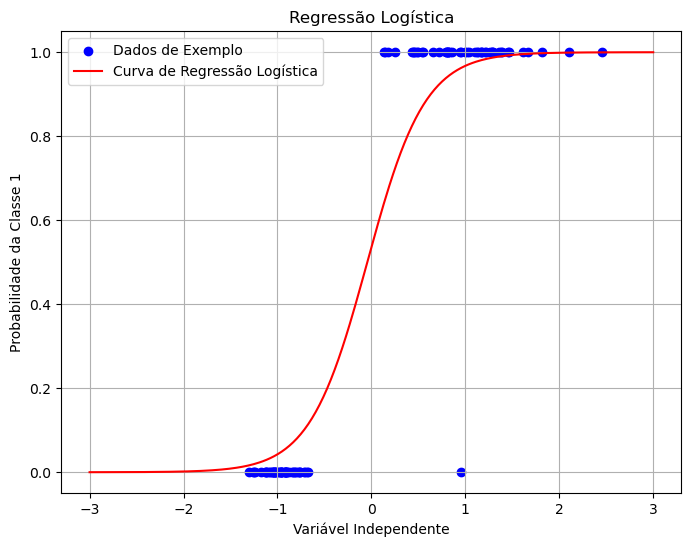

In [4]:
# Modelo de regressão logística
model = LogisticRegression()
model.fit(X, y)

# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', marker='o', label='Dados de Exemplo')

# Plotando a curva de regressão logística
X_test = np.linspace(-3, 3, 300) #Gerar os valores de teste para a variável independente
y_prob = model.predict_proba(X_test.reshape(-1, 1))[:, 1] #Calcular as probabilidades previstas de pertencer à classe 1
plt.plot(X_test, y_prob, color='red', label='Curva de Regressão Logística') #Plot das probabilidades contra a variável independente

plt.title('Regressão Logística')
plt.xlabel('Variável Independente')
plt.ylabel('Probabilidade da Classe 1')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Gerando dados com 1000 exemplos e 2 features

In [5]:
#Gerando dados de exemplo com diferentes configurações
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [6]:
pd.DataFrame(X)

,0,1
0,0.601034,1.535353
1,0.755945,-1.172352
2,1.354479,-0.948528
3,3.103090,0.233485
4,0.753178,0.787514
...,...,...
995,1.713939,0.451639
996,1.509473,-0.794996
997,2.844315,0.211294
998,-0.025876,1.619258


In [7]:
pd.Series(y) #Target

0      1
1      0
2      0
3      0
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Length: 1000, dtype: int32

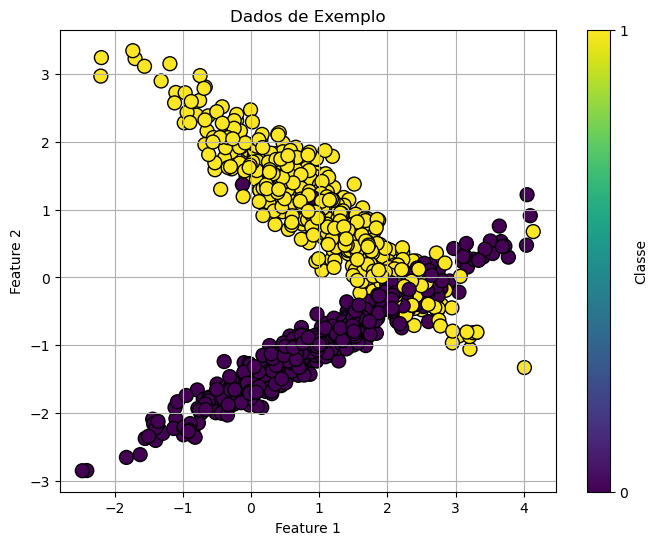

In [8]:
# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Dados de Exemplo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Classe')
plt.grid(True)
plt.show()

In [9]:
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Tamanho de X:  (1000, 2) 

Tamanho de y:  (1000,) 



>**Prática:**

Varie os parâmetros da função make_classification, como n_samples, n_features, n_informative, e observe como isso afeta a separação entre as classes.

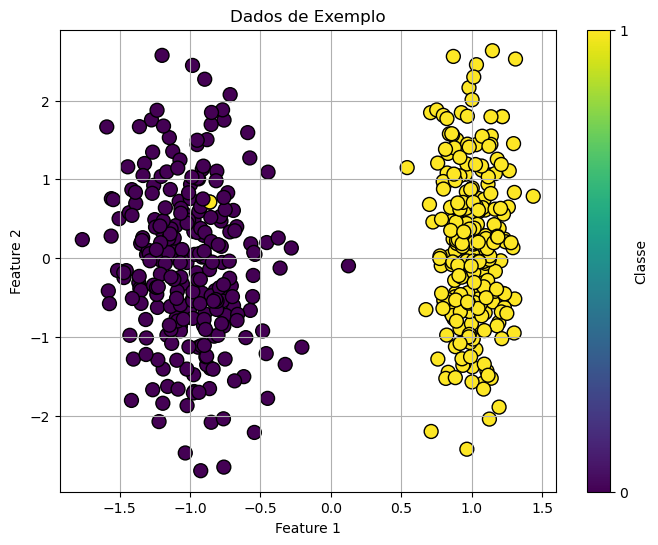

In [10]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)
# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Dados de Exemplo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Classe')
plt.grid(True)
plt.show()



### Quebrando o dataset em treinamento e teste

Para quebrar os dados em train e test usar a função do Scikit-Learn [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
#Dividindo os dados em conjunto de treinamento e teste com diferentes tamanhos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (450, 2) 

Tamanho de X_test:  (50, 2) 

Tamanho de y_train:  (450,) 

Tamanho de y_test:  (50,) 



>**Prática:**

Altere o tamanho do conjunto de treinamento (por exemplo, 60%, 70%, 75%) e observe como isso afeta o desempenho do modelo.

In [13]:

from sklearn.metrics import accuracy_score

# Função para treinar e avaliar o modelo
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Diferentes tamanhos de conjunto de treinamento
train_sizes = [0.6, 0.7, 0.80]

# Iterar sobre os diferentes tamanhos de conjunto de treinamento
for train_size in train_sizes:
    # Dividindo os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_size, random_state=42)
    # Treinando e avaliando o modelo
    accuracy = train_and_evaluate(X_train, X_test, y_train, y_test)
    print(f"Tamanho do conjunto de treinamento: {train_size * 100}% - Precisão: {accuracy}")


Tamanho do conjunto de treinamento: 60.0% - Precisão: 0.995
Tamanho do conjunto de treinamento: 70.0% - Precisão: 1.0
Tamanho do conjunto de treinamento: 80.0% - Precisão: 1.0


### Treinando o modelo com Regressão Logistica

[`sklearn.model_selection.LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train) #Treina

LogisticRegression()

### Gerando predições e avaliando o modelo

In [15]:
#Previsões nos dados de teste
y_pred = model.predict(X_test) #gera as predições

Acurácia do modelo: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



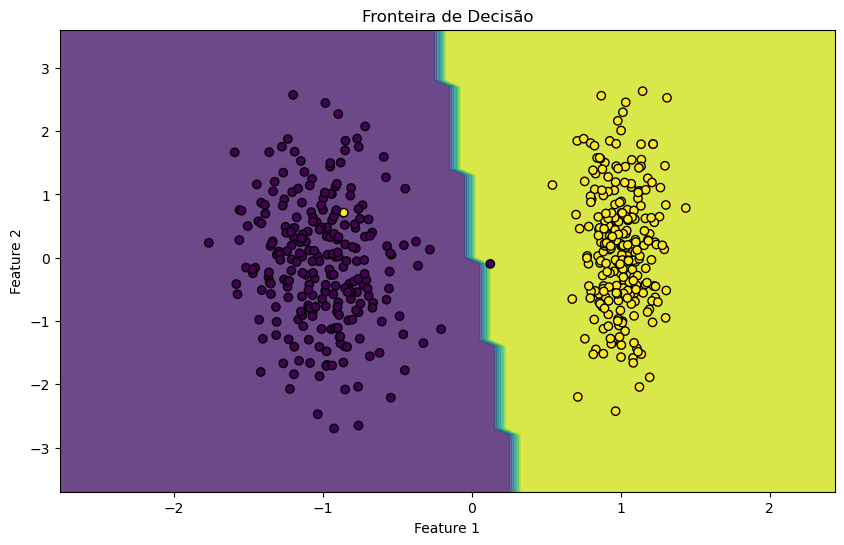

In [16]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("\nRelatório de Classificação:\n", class_report)

# fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Fronteira de Decisão')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

>**Prática:**

Experimente ajustar os hiperparâmetros do modelo de regressão logística, como a penalidade (penalty), a regularização (C) ou o método de solução (solver), e observe como isso afeta o desempenho do modelo.

Penalidade: l1
Acurácia do modelo: 0.996

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.99      1.00      1.00       123

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



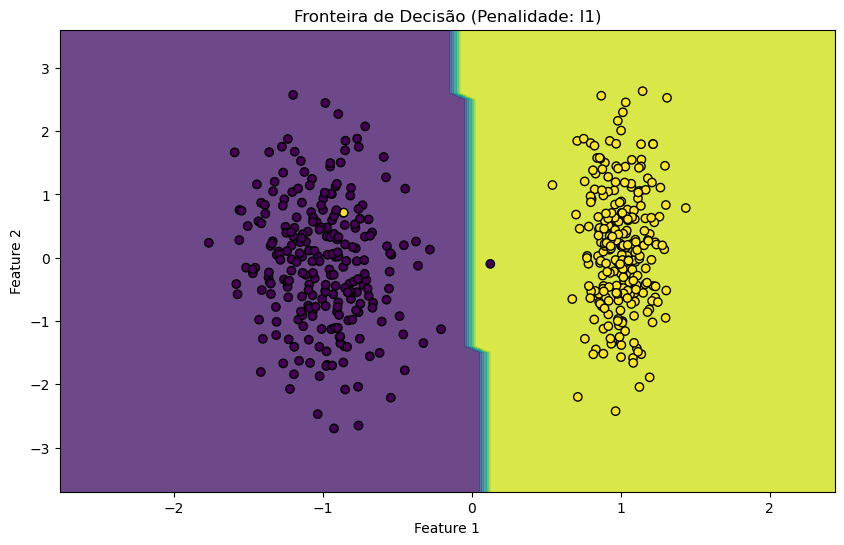

Penalidade: l2
Acurácia do modelo: 0.996

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.99      1.00      1.00       123

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



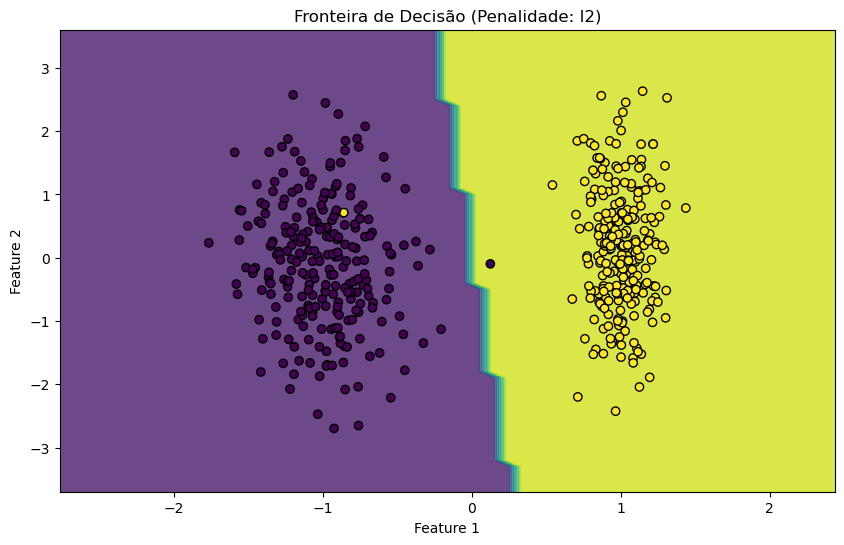

In [17]:


# Função para treinar e avaliar o modelo
def train_and_evaluate(X_train, X_test, y_train, y_test, penalty):
    model = LogisticRegression(penalty=penalty, solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, class_report, model

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Hiperparâmetros para testar
penalties = ['l1', 'l2']

# Iterando sobre os diferentes valores de penalidade
for penalty in penalties:
    # Treinando e avaliando o modelo com a penalidade atual
    accuracy, class_report, model = train_and_evaluate(X_train, X_test, y_train, y_test, penalty=penalty)
    print(f"Penalidade: {penalty}")
    print("Acurácia do modelo:", accuracy)
    print("\nRelatório de Classificação:\n", class_report)

    # Plotando a fronteira de decisão
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.title(f'Fronteira de Decisão (Penalidade: {penalty})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


# **Atividades**

## **Atividade 1 - Regressão com o dataset Wine**

Features 13:
1. Teor alcoólico
2. Ácido málico
3. Cinzas
4. Alcalinidade das cinzas
5. Magnésio
6. Fenóis totais
7. Flavonoides
8. Fenóis não flavonoides
9. Proantocianidinas
10. Intensidade da cor
11. Matiz (tom)
12. OD280/OD315 de vinhos diluídos
13. Prolina

Variável dependente: Classe do vinho
1. Classe 0: Vinhos da primeira origem geográfica.
2. Classe 1: Vinhos da segunda origem geográfica.
3. Classe 2: Vinhos da terceira origem geográfica.


**Achar a acurácia, precision, recall e f1-score do modelo nos dados de teste**

>Obs: usar `test_size = 0.2` e `random_state = 42`

>Obs2: Para visualização dos dados pode aplicar PCA para reduzir a dimensionalidade para 2 (sklearn.decomposition.PCA)


In [32]:
data = datasets.load_wine()

In [34]:
colunas = ['Teor alcoólico', 'Acidez málica', 'Cinzas']
pd.DataFrame(data['data'][:, :3], columns=colunas)

,Teor alcoólico,Acidez málica,Cinzas
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
...,...,...,...
173,13.71,5.65,2.45
174,13.40,3.91,2.48
175,13.27,4.28,2.26
176,13.17,2.59,2.37


# Resposta Atv 1:

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn import datasets



data = datasets.load_wine()
X = data['data']
y = data['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print("Métricas de Avaliação:\n")
print(f"Acurácia: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-score: {f1:.2f}%")
print("\nRelatório de Classificação:")
print(class_report)


Métricas de Avaliação:

Acurácia: 0.72%
Precision: 0.70%
Recall: 0.72%
F1-score: 0.71%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.67      0.71      0.69        14
           2       0.33      0.25      0.29         8

    accuracy                           0.72        36
   macro avg       0.64      0.65      0.65        36
weighted avg       0.70      0.72      0.71        36



## **Atividade 2 - Regressão com o dataset Breast cancer**

Features: Total de 30

Para essa atividade utilizar as features:
1. Mean radius
2. Mean texture

Variável dependente: Presença de câncer de mama maligno ou benigno
1. 0:  Indica que o tumor é maligno (câncer de mama maligno).
2. 1: Indica que o tumor é benigno (câncer de mama benigno).


>**Achar a acurácia, precision, recall e f1-score do modelo nos dados de teste**

>**Plotar a matriz de confusão nos dados de teste**

>**Plotar a fronteira de decisão da regressão**

>>Obs: Variar os hiperparametros da Regressão Logistica

>>Obs2: usar `test_size = 0.2` e `random_state = 42`



In [22]:
data = datasets.load_breast_cancer()

In [23]:
colunas = ['Mean radius', 'Mean texture']
pd.DataFrame(data['data'][:, :2], columns=colunas)

,Mean radius,Mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


# Resposta Atv 2

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_breast_cancer()
X = data['data'][:, :2]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Métricas de Avaliação :\n")
print(
    f" Acurácia: {accuracy:.2f}%\n Precisão: {precision:.2f}%\n Recall: {recall:.2f}%\n F1-score: {f1:.2f}%")
class_report = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:\n", class_report)

Métricas de Avaliação :

 Acurácia: 0.91%
 Precisão: 0.92%
 Recall: 0.94%
 F1-score: 0.93%

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.92      0.94      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



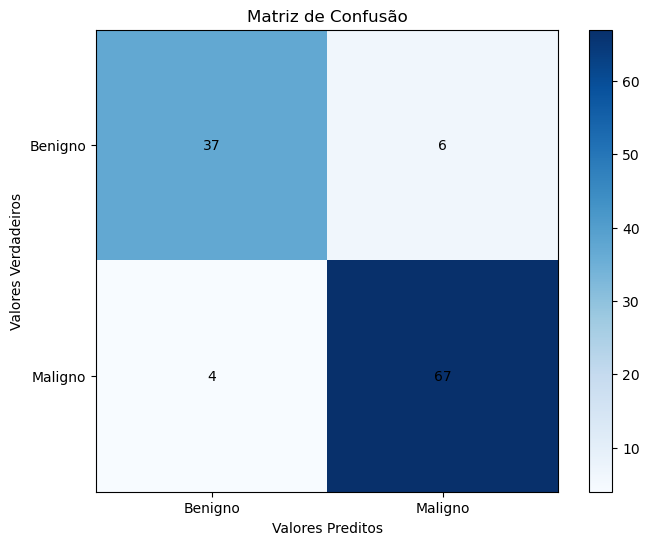

In [25]:
conf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.xticks([0, 1], ['Benigno', 'Maligno'])
plt.yticks([0, 1], ['Benigno', 'Maligno'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.show()

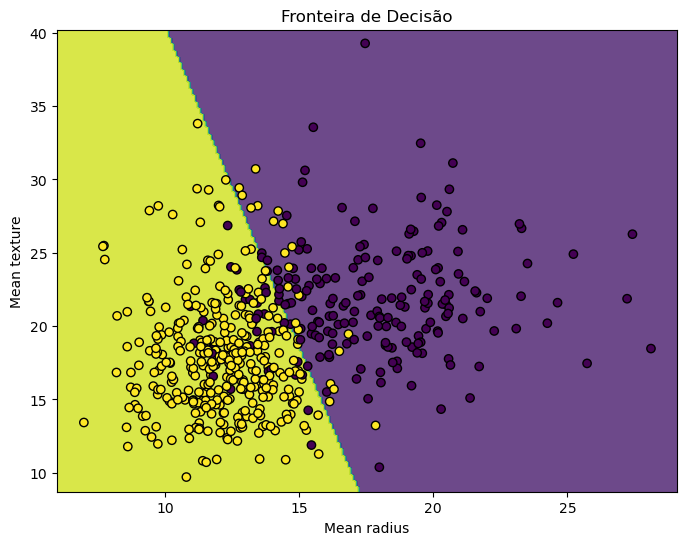

In [26]:
# fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Fronteira de Decisão')
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.show()

## **Atividade 3 - Regressão com dataset Titanic**

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1`
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

Para essa atividade utilizar as features:
1. pclass
2. female
3. age
4. fare'

Variável dependente: passageiro sobreviveu (survived)?
1. 0: não
2. 1: sim


>**Achar a acurácia, precision, recall e f1-score do modelo nos dados de teste**

>>Obs: ajustar os hiperparametros da Regressão Logistica para: `max_iter = 25` (número máximo de iterações) e `random_state=123`. Repetir o teste com `max_iter = 100` e comparar o resultado;

>>Obs2: ajustar o conjunto de dados para teste e treino com o parâmetros: `test_size = 0.30` e `random_state = 123`;


In [27]:
import seaborn as sns

titanic= sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names]
y = titanic['survived']
X  # DataFrame somente com as colunas de feature_names

,pclass,female,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
885,3,1,39.0,29.1250
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
889,1,0,26.0,30.0000


In [28]:
y  # Series da coluna survived

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

# Resposta Atv 3

In [29]:
titanic = sns.load_dataset('titanic')



feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)

X = titanic[feature_names]
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)


In [30]:
from sklearn.metrics import precision_score

#  max_iter = 25
model_25 = LogisticRegression(max_iter=25, random_state=123)
model_25.fit(X_train, y_train)

y_pred_25 = model_25.predict(X_test)


accuracy_25 = accuracy_score(y_test, y_pred_25)
precision_25 = precision_score(y_test, y_pred_25)
recall_25 = recall_score(y_test, y_pred_25)
f1_25 = f1_score(y_test, y_pred_25)

print("Métricas de Avaliação :\n")
print(f" Acurácia: {accuracy_25:.2f}%\n Precisão: {precision_25:.2f}%\n Recall: {recall_25:.2f}%\n F1-score: {f1_25:.2f}%")

class_report = classification_report(y_test, y_pred_25)
print("\nRelatório de Classificação:\n", class_report)


Métricas de Avaliação :

 Acurácia: 0.75%
 Precisão: 0.69%
 Recall: 0.68%
 F1-score: 0.68%

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       131
           1       0.69      0.68      0.68        84

    accuracy                           0.75       215
   macro avg       0.74      0.74      0.74       215
weighted avg       0.75      0.75      0.75       215



c:\Users\Pichau\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:


# max_iter = 100
model_100 = LogisticRegression(max_iter=100, random_state=123)
model_100.fit(X_train, y_train)

y_pred_100 = model_100.predict(X_test)

accuracy_100 = accuracy_score(y_test, y_pred_100)
precision_100 = precision_score(y_test, y_pred_100)
recall_100 = recall_score(y_test, y_pred_100)
f1_100 = f1_score(y_test, y_pred_100)

print("Métricas de Avaliação :\n")
print(f" Acurácia: {accuracy_100:.2f}%\n Precisão: {precision_100:.2f}%\n Recall: {recall_100:.2f}%\n F1-score: {f1_100:.2f}%")

class_report = classification_report(y_test, y_pred_100)
print("\nRelatório de Classificação:\n", class_report)



Métricas de Avaliação :

 Acurácia: 0.77%
 Precisão: 0.70%
 Recall: 0.71%
 F1-score: 0.71%

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       131
           1       0.70      0.71      0.71        84

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215

